In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### PROBLEMA #1

In [135]:
def extraer_de_imagen(imagen, color):
    
    if(color == 1):
        b = imagen.copy()
        b[:, :, 0] = 0
        b[:, :, 1] = 0
        return b
    
    if(color == 2):
        g = imagen.copy()
        g[:, :, 0] = 0
        g[:, :, 2] = 0
        return g
    
    if(color == 3):
        r = imagen.copy()
        r[:, :, 1] = 0
        r[:, :, 2] = 0
        return r

    if(color == 10):
        rg = imagen.copy()
        rg[:, :, 2] = 0
        return rg   
    
    if(color == 20):
        gb = imagen.copy()
        gb[:, :, 0] = 0
        return gb  
     
    if(color == 30):
        rb = imagen.copy()
        rb[:, :, 1] = 0
        return rb   

    return imagen

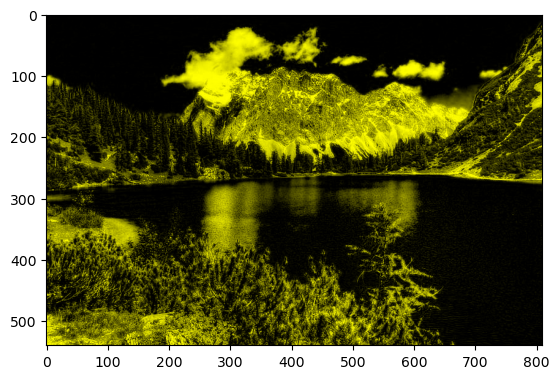

In [148]:
    
plt.imshow(extraer_de_imagen(cv2.imread("imagen1/imagen1_salida_gray_rojo.jpg"), 10))

### PROBLEMA #2

In [65]:
def recrear(img_r, img_g, img_b):
    
    b = img_b.copy()
    b[:, :, 0] = 0
    b[:, :, 1] = 0

    g = img_g.copy()
    g[:, :, 0] = 0
    g[:, :, 2] = 0

    r = img_r.copy()
    r[:, :, 1] = 0
    r[:, :, 2] = 0
    
    return r+g+b


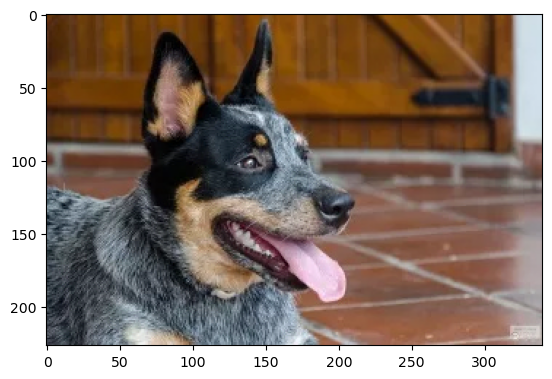

In [70]:

plt.imshow(recrear(cv2.imread("perro/perro_salida_gray_rojo.jpg"), cv2.imread("perro/perro_salida_gray_verde.jpg"), cv2.imread("perro/perro_salida_gray_azul.jpg")))

### PROBLEMA #3

In [76]:
def gris3D(imagen):
    b = imagen.copy()
    b[:, :, 0] = b[:, :, 2]
    b[:, :, 1] = b[:, :, 2]

    g = imagen.copy()
    g[:, :, 0] = g[:, :, 1]
    g[:, :, 2] = g[:, :, 1]

    r = imagen.copy()
    r[:, :, 1] = r[:, :, 0]
    r[:, :, 2] = r[:, :, 0]
    
    return r, g, b

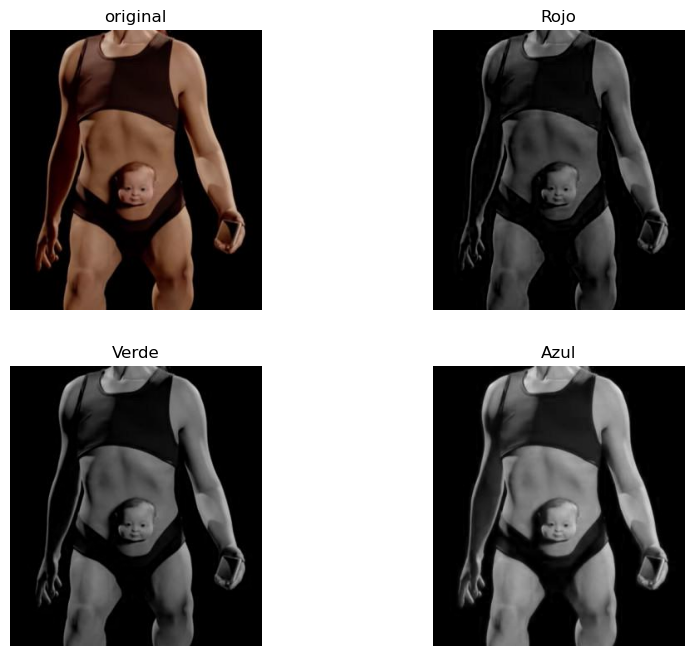

In [95]:
grises = gris3D(cv2.imread("Humano Estandar.png"))

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(cv2.imread("Humano Estandar.png"), cv2.COLOR_BGR2RGB))
plt.title("original")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(grises[0])
plt.title("Rojo")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(grises[1])
plt.title("Verde")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(grises[2])
plt.title("Azul")
plt.axis('off')

plt.show()

### PROBLEMA #4

In [170]:
def histogramas(imagen):
    r, g, b  = gris3D(imagen)
    gris = np.mean(imagen, axis = 2)
    
    plt.figure(figsize=(15,10))

    plt.subplot(2, 2, 1)
    hist, bin = np.histogram(gris.flatten(), 256, [0, 256])
    mean_gris = np.mean(gris)
    plt.plot(hist, color="black")
    plt.axvline(mean_gris, color='k', linestyle='dashed', linewidth=1)
    plt.title("Gris")
    plt.xlabel('Intensidad de pixel')
    plt.ylabel('Frecuencia')

    plt.subplot(2, 2, 2)
    hist, bin = np.histogram(r.flatten(), 256, [0, 256])
    mean_rojo = np.mean(r.flatten())
    plt.plot(hist, color="red")
    plt.axvline(mean_rojo, color='k', linestyle='dashed', linewidth=1)
    plt.title("Rojo")
    plt.xlabel('Intensidad de pixel')
    plt.ylabel('Frecuencia')
    
    plt.subplot(2, 2, 3)
    hist, bin = np.histogram(g.flatten(), 256, [0, 256])
    mean_verde = np.mean(g.flatten())
    plt.plot(hist, color="green")
    plt.axvline(mean_verde, color='k', linestyle='dashed', linewidth=1)
    plt.title("Verde")
    plt.xlabel('Intensidad de pixel')
    plt.ylabel('Frecuencia')

    plt.subplot(2, 2, 4)
    hist, bin = np.histogram(b.flatten(), 256, [0, 256])
    mean_azul = np.mean(b.flatten())
    plt.plot(hist, color="blue")
    plt.axvline(mean_azul, color='k', linestyle='dashed', linewidth=1)
    plt.title("Azul")
    plt.xlabel('Intensidad de pixel')
    plt.ylabel('Frecuencia')

    plt.show()
        

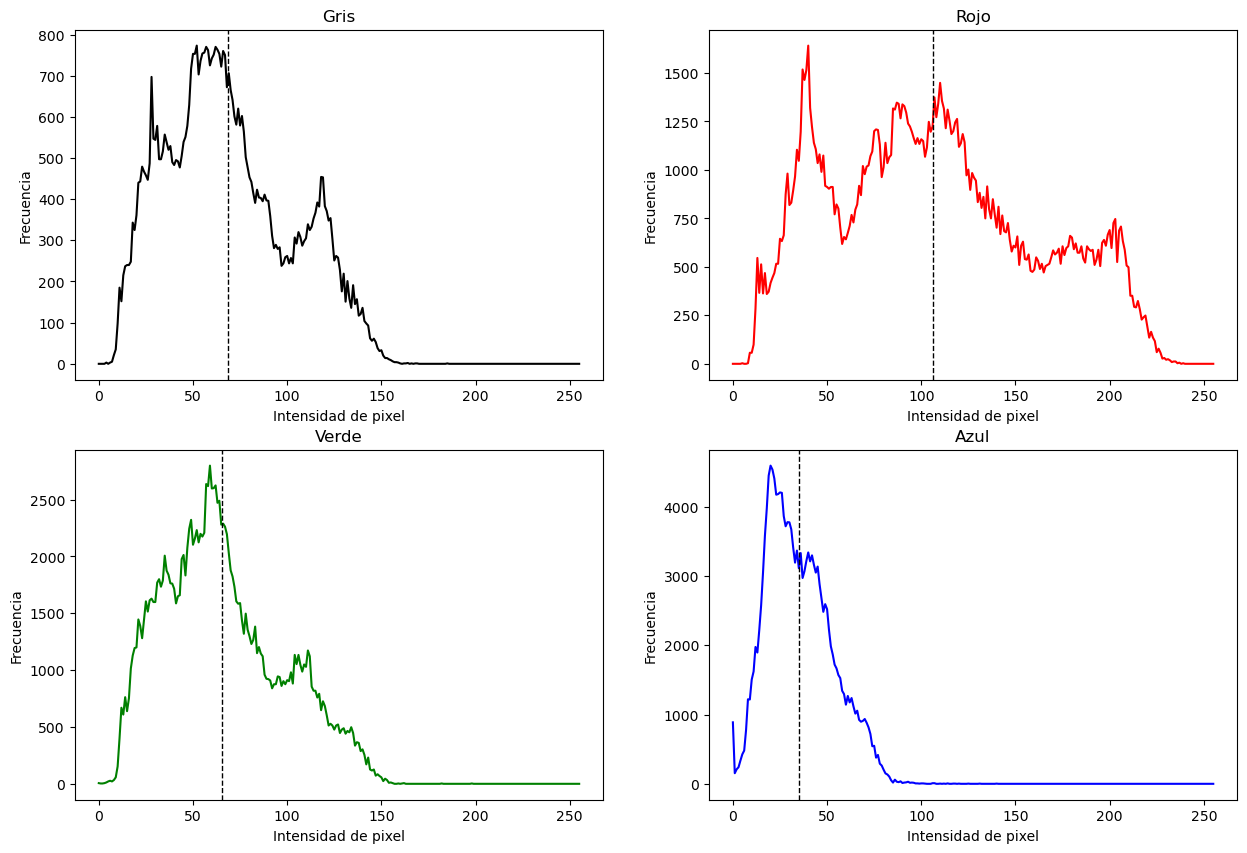

In [174]:
histogramas(cv2.cvtColor(cv2.imread("ElMago.jpeg"), cv2.COLOR_BGR2RGB))

### PROBLEMA #5

In [186]:
def grisPonderado(imagen, nR, nG, nB):
    r, g, b = gris3D(imagen)
    
    return ((r*nR) + (g*nG) + (b*nB)).astype(int)
    

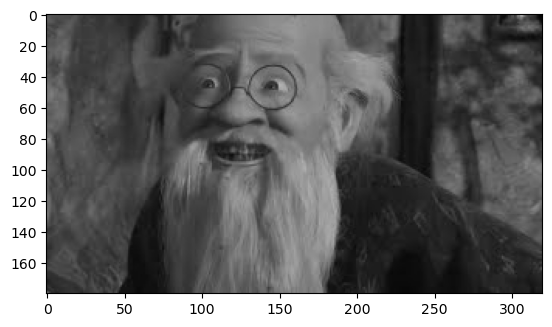

In [197]:
plt.imshow(grisPonderado(cv2.cvtColor(cv2.imread("ElMago.jpeg"), cv2.COLOR_BGR2RGB), 0.5, 0.2, 0.3))

### PROBLEMA #6

HSV
Es un vector de 3 numeros donde H (Hue, Matiz) indica el "Color" va de 0 a 360 y cada angulo indica un color diferene siendo 0 y 360 rojo, S (Satruation, Saturacion) indica que tan "fuerte" es este color va de 0 a 100 y V (Value, Valor) indica que indica que tanto "brillo" tiene (por consecuencia tambien se le puede identificar con B o L (para crear el acronimo HSL) va de 0 a 100, .

Su proposito es hacer mas facil traducir un color a lenguaje de computador, en ves de sacar un rosado con (255, 150, 150) en RGB, se usaria (0, 41, 80) indicando (rojo, medio saturado, casi totalmente blanco). 

Para pasar de HSV a RGB estas son las ecuaciones:

$$
{\displaystyle H^{\prime }={\frac {H}{60^{\circ }}}}
$$

$$
{\displaystyle C=(1-\left\vert 2V-1\right\vert )\times S_{V}}
$$

$$
{\displaystyle X=C\times (1-|H^{\prime }\;{\bmod {2}}-1|)}
$$

$$
{\displaystyle (R_{1},G_{1},B_{1})={\begin{cases}(C,X,0)&{\text{if }}0\leq H^{\prime }<1\\(X,C,0)&{\text{if }}1\leq H^{\prime }<2\\(0,C,X)&{\text{if }}2\leq H^{\prime }<3\\(0,X,C)&{\text{if }}3\leq H^{\prime }<4\\(X,0,C)&{\text{if }}4\leq H^{\prime }<5\\(C,0,X)&{\text{if }}5\leq H^{\prime }<6\end{cases}}}
$$


$$
{\displaystyle m=V-{\frac {C}{2}}}
$$


$$
{\displaystyle (R,G,B)=(R_{1}+m,G_{1}+m,B_{1}+m)}
$$
